# ADS Capstone Project: Airbnb Pricing Prediction
#### By Renetta Nelson, Michael Nguyen and Jacqueline Urenda

# Modeling

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
import graphviz


from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.utils import plot_model
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf


from sklearn import linear_model, metrics
from statsmodels.tsa.stattools import adfuller
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split



### Importing Datasets

In [3]:

%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r final_df2
%store -r X
%store -r y


In [6]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=1)



### ARIMA Model

In [6]:
arima_model = ARIMA(final_df2["price"], order = (1,1,1))
arima_fit = arima_model.fit()
arima_fit.summary()



c:\Users\nelso\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nelso\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\nelso\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:              3882606
Model:                 ARIMA(1, 1, 1)   Log Likelihood           -33366979.920
Date:                Sun, 30 Jul 2023   AIC                       66733965.841
Time:                        19:50:01   BIC                       66734005.357
Sample:                             0   HQIC                      66733976.157
                            - 3882606                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       9.898e-05      0.001      0.128      0.898      -0.001       0.002
ma.L1         -1.0000   6.15e-08  -1.63e+07      0.000      -1.000      -1.000
sigma2      1.709e+06   9.29e-10   1.84e+15      0.000    1.71e+06    1.71e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):     1650440546859.08
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                            44.46
Prob(H) (two-sided):                  0.00   Kurtosis:                      3195.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.32e+28. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='date'>

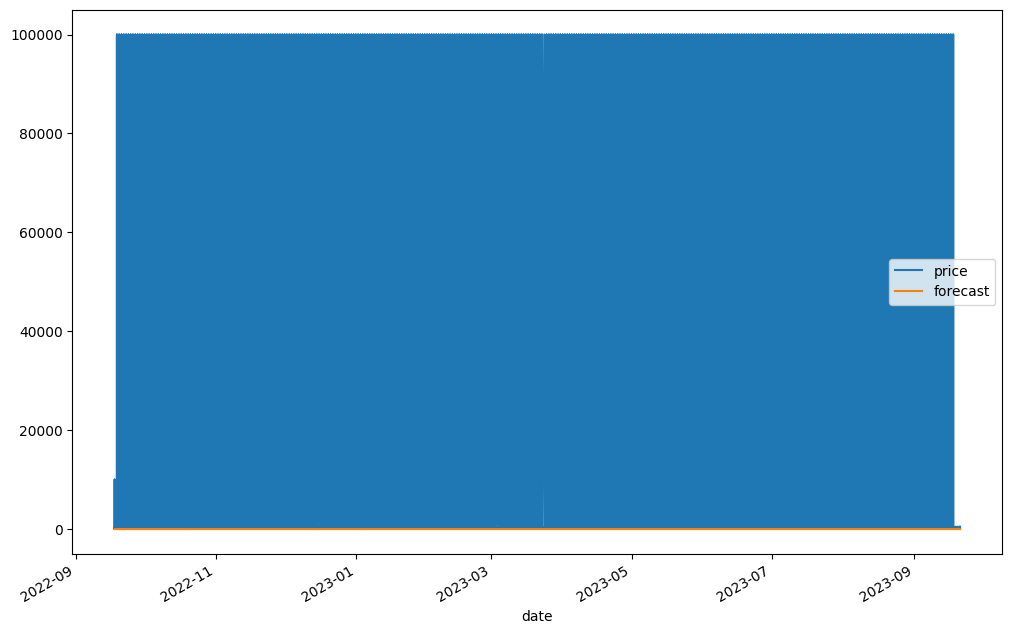

In [8]:

final_df2["forecast"] = arima_fit.predict(dynamic=True)

final_df2[["price", "forecast"]].plot(figsize=(12,8))

In [4]:
#s_model = sm.tsa.statespace.SARIMAX(final_df2["price"], order=(1,1,1), seasonal_order=(1,1,1,12))

#s_fit = s_model.fit()


### Linear Regression

In [10]:
lreg_model = linear_model.LinearRegression()
lreg_model.fit(X_train, y_train)


LinearRegression()

In [11]:
print("Variance Score: ", lreg_model.score(X_test, y_test))

Variance Score:  0.012165116331544712


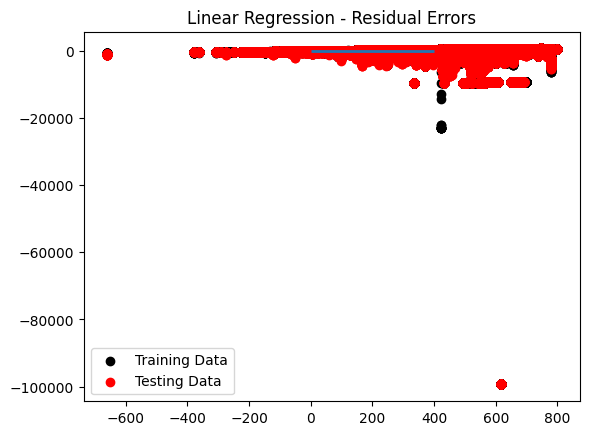

In [12]:
plt.scatter(lreg_model.predict(X_train), lreg_model.predict(X_train)-y_train, color='black', label='Training Data')

plt.scatter(lreg_model.predict(X_test), lreg_model.predict(X_test)-y_test, color='red', label='Testing Data')


plt.hlines(y=0, xmin=0, xmax=400, linewidth=2)
plt.legend(loc="lower left")
plt.title("Linear Regression - Residual Errors")
plt.show()


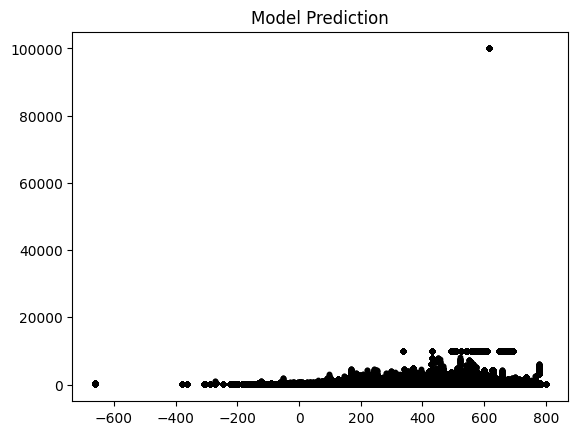

In [13]:
y_pred = lreg_model.predict(X_test)

plt.scatter(y_pred, y_test, color='black', s=10, label='Testing Data')

#plt.scatter(X_train, X_test)
#plt.plot(X_train, y_pred, color = "green")
plt.title("Model Prediction")
plt.show()

In [14]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("MAE: ", mean_absolute_error(y_test, y_pred))
print( "r_squared: ", r2_score(y_test, y_pred))


MSE:  1740703.0128987157
MAE:  353.4248508975692
r_squared:  0.012165116331544712


In [15]:
errors_list = []

for i in range(len(y_test)):
    errors = (y_test[i] - y_pred[i])**2
    errors_list.append(errors)

pyplot.plot(errors_list)
pyplot.xticks(ticks=[i for i in range(len(errors_list))], labels=y_pred)
pyplot.ylabel("MSE")
pyplot.xlabel("Predicted")
pyplot.show()

KeyboardInterrupt: 